# Analyzing Heart Disease  
  
# Project By:- Amarish Kumar Srivastava 
  
Hello! I'll be exploring the [heart disease dataset](https://archive.ics.uci.edu/ml/datasets/heart+Disease) provided by the University of California, Irvine. The database that this set came from contains 76 attributes, but the set itself only contains 14.






ii: Downsloping
12. ca (coloured arteries) - Number of major vessels (0-3) colored by flourosopy
13. thal - 3 = normal; 6 = fixed defect; 7 = reversable defect
14. target - 0 = Heart disease present, 1 = Heart disease absent

#Objective
1. Find any correlations between attributes
2. Find correlations between each attribute and the diagnosis of heart disease

# Let's Begin!

In [1]:
# importing the important libraries
import numpy as np
import pandas as pd
import scipy.stats # Needed to compute statistics for categorical data (yep I'm using my AP Stats skills!)
import matplotlib.pyplot as plt
import seaborn as sns
sns.set() # Making sns as default for plots 

data = pd.read_csv('heart.csv') #for some reason "from google.colab import files" isn't working for me...
data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [2]:
data.shape

(303, 14)

In [3]:
data.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

Yay! No NaN or null values!
#Time for Pairplot

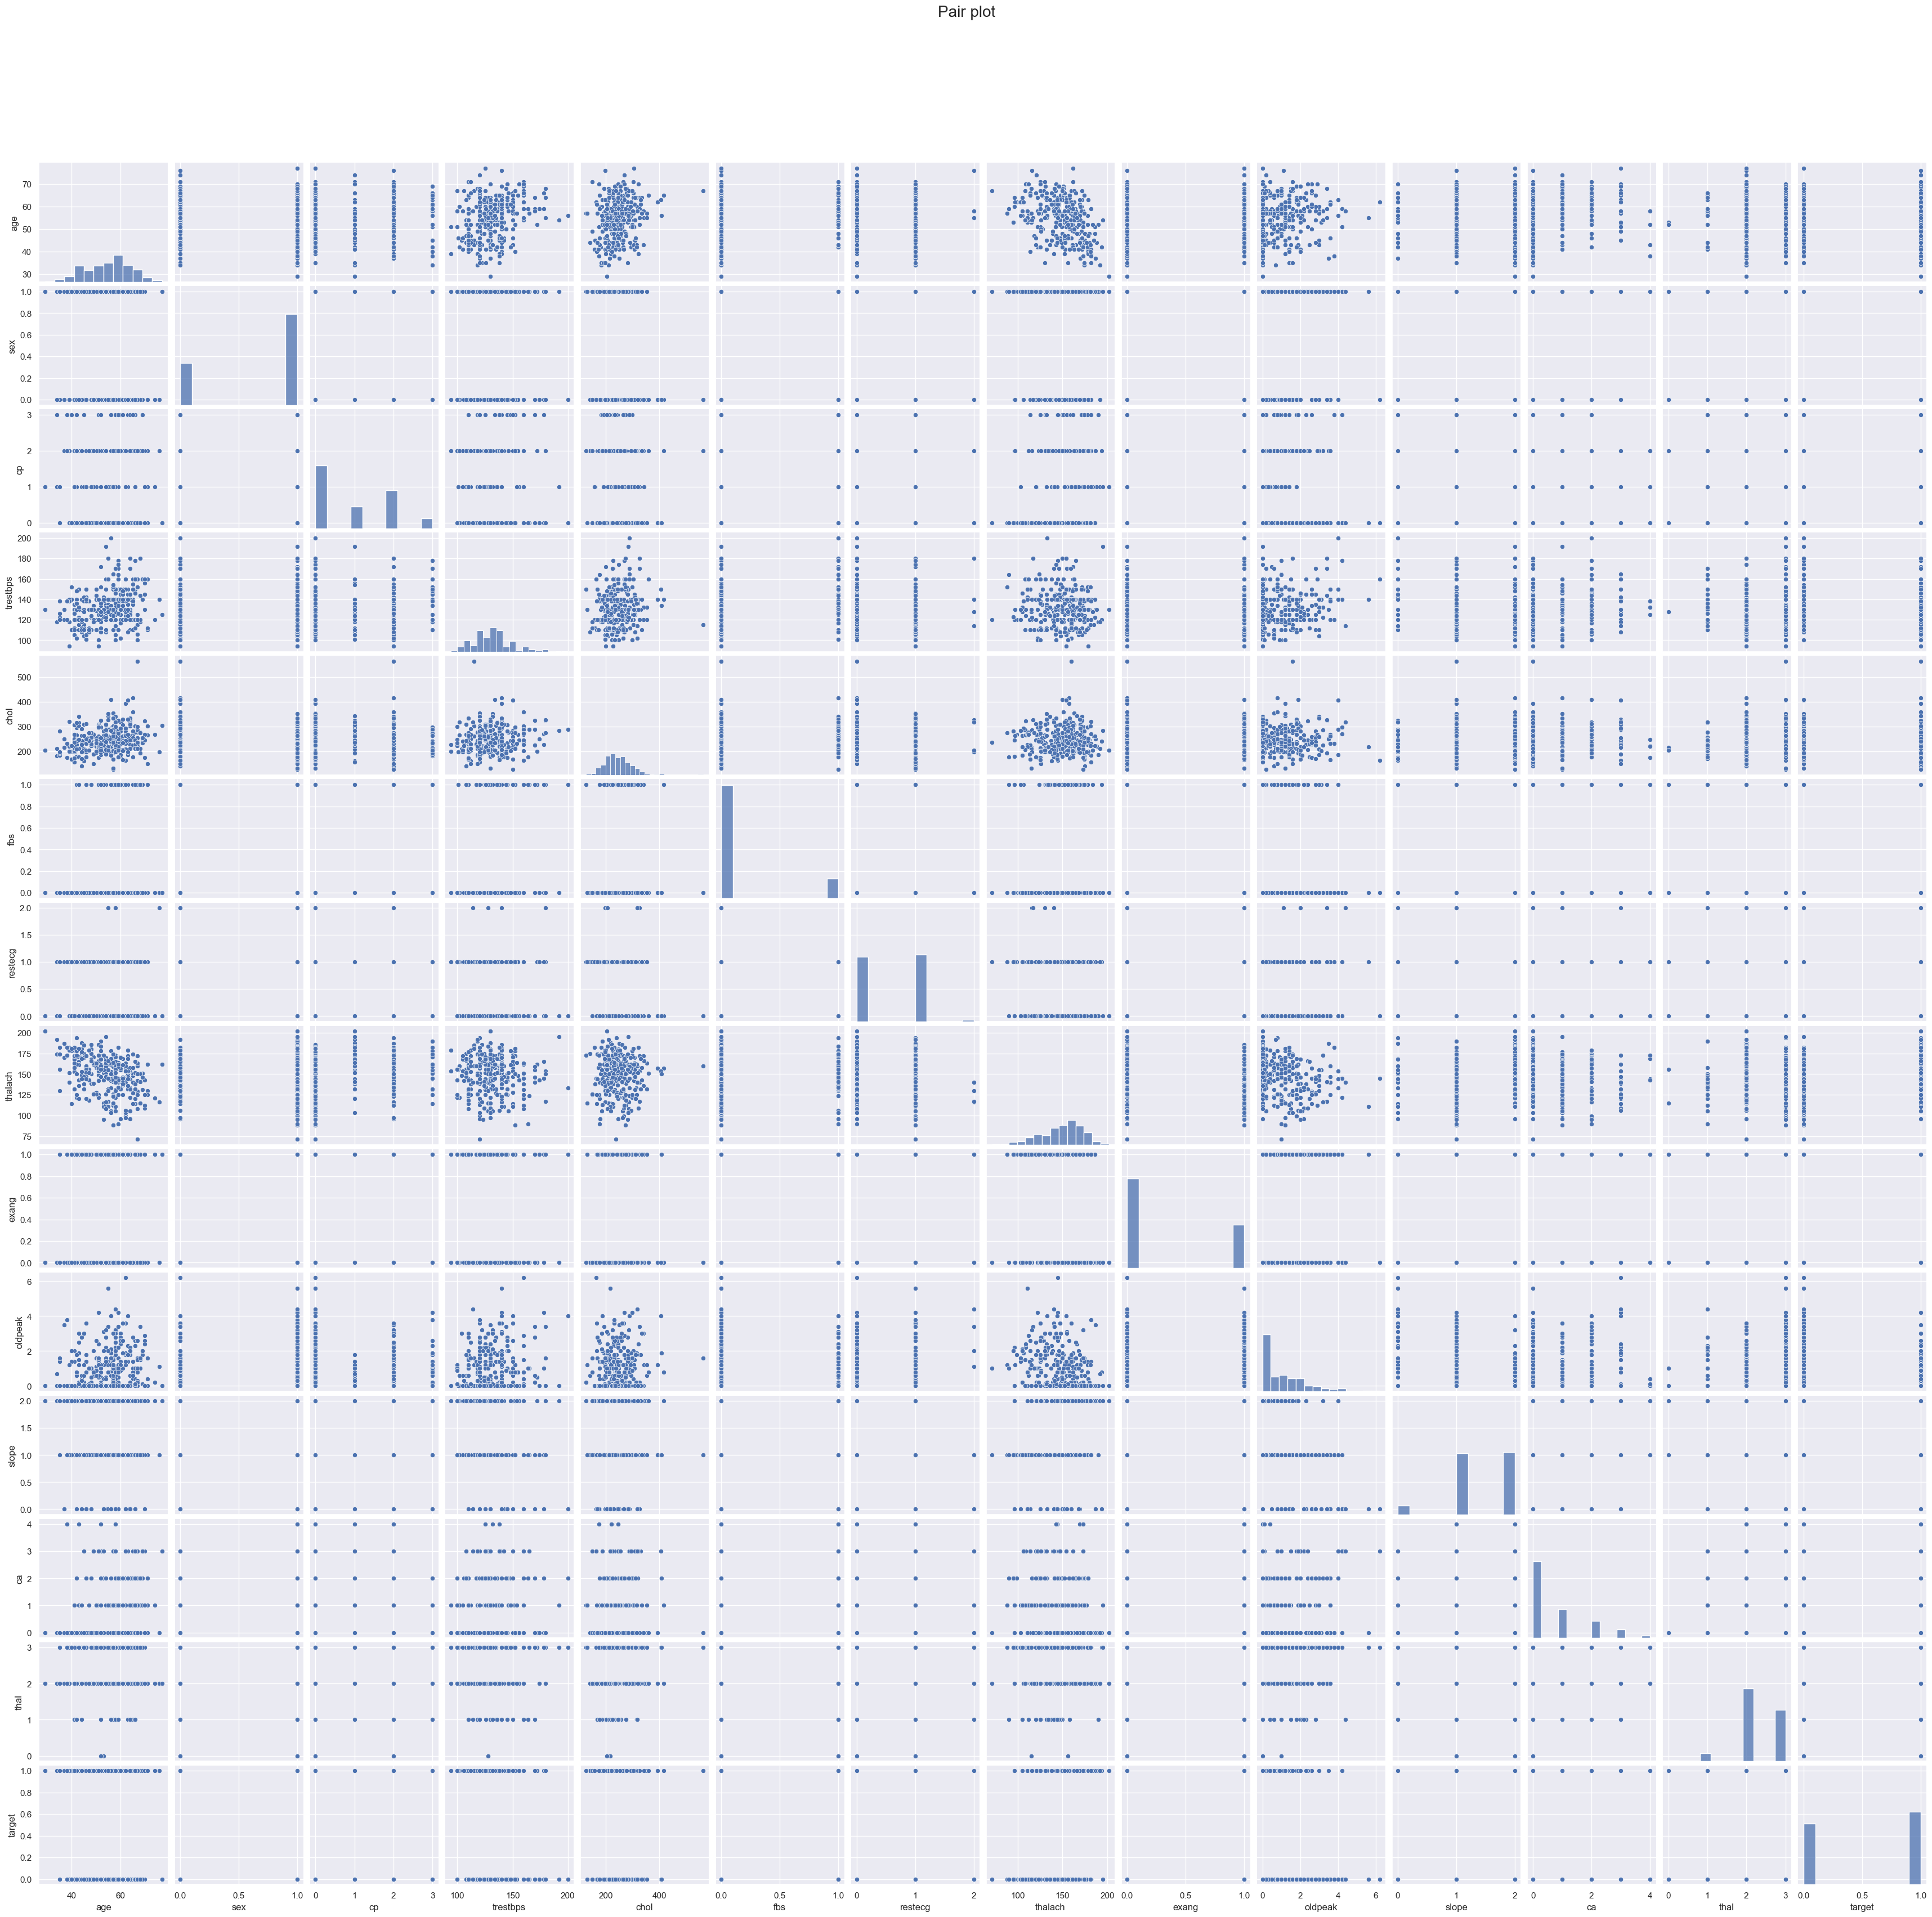

In [4]:
g = sns.pairplot(data)
g.fig.suptitle('Pair plot', fontsize = 20)
g.fig.subplots_adjust(top= 0.9);

# Correlation Matrix

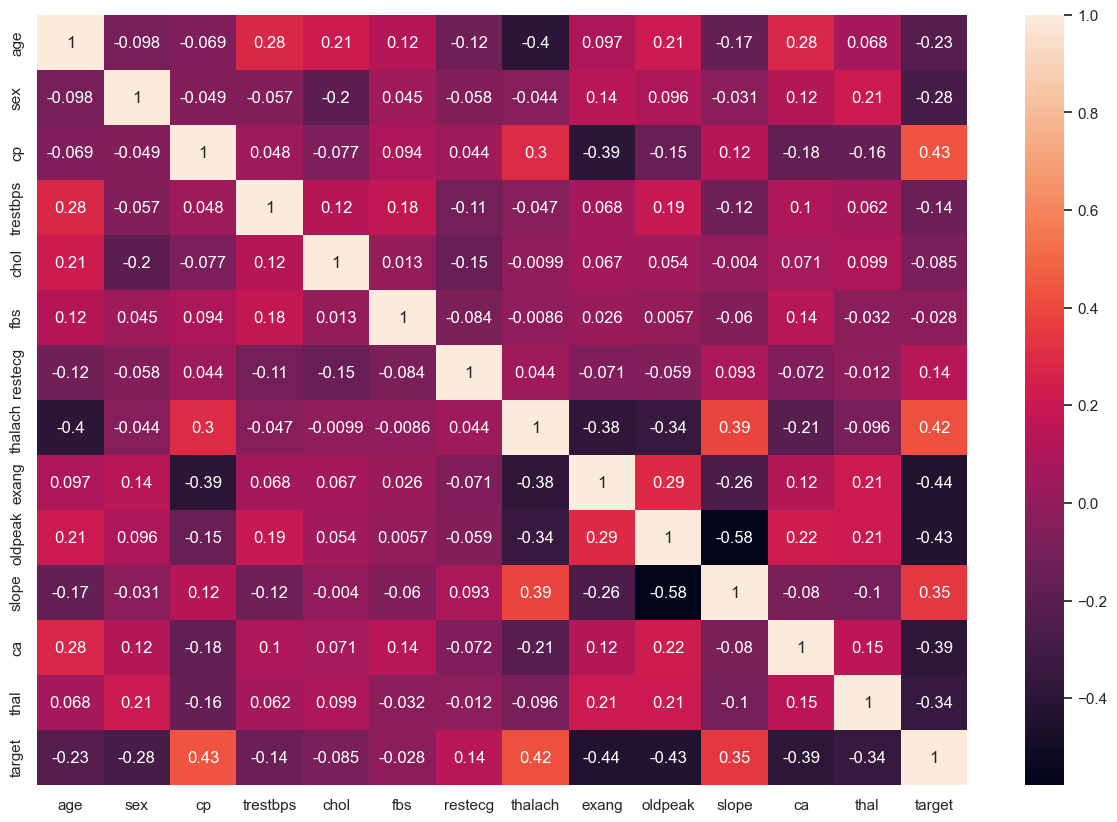

In [5]:
plt.figure(figsize=(15,10))
 
corrMatrix = data.corr()
sns.heatmap(corrMatrix, annot=True)
plt.show()

# Correlation between age and heart disease

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


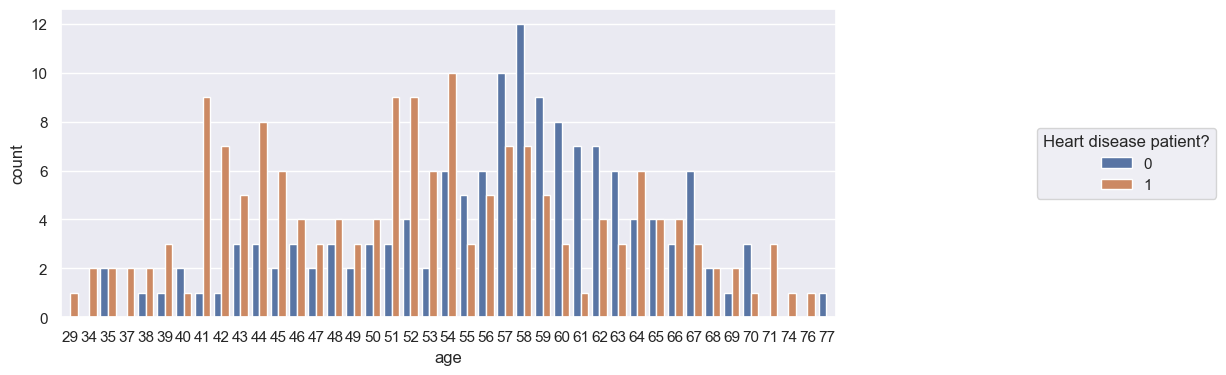

In [6]:
# Look into distribution by plotting a histogram
plt.figure(figsize=(10,4))
plt.legend(loc='upper left')

g = sns.countplot(data = data, x = 'age', hue = 'target')
g.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

Seems like heart disease patients are clustered around the ages of late 50's and 60's

In [7]:
# Heart disease patients
age_corr = ['age', 'target']
age_corr1 = data[age_corr]
age_corr_y = data[age_corr1['target'] == 0].groupby(['age']).size().reset_index(name = 'count')
age_corr_y.corr()

,age,count
age,1.000000,0.337858
count,0.337858,1.000000


In [8]:
# Healthy patients
age_corr_n = age_corr1[age_corr1['target'] == 1].groupby(['age']).size().reset_index(name = 'count')
age_corr_n.corr()

,age,count
age,1.000000,-0.129151
count,-0.129151,1.000000


High correlation between heart disease patients and age. It seems like age is the precursor of heart disease.

#Correlation between heart disease patients and sex

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


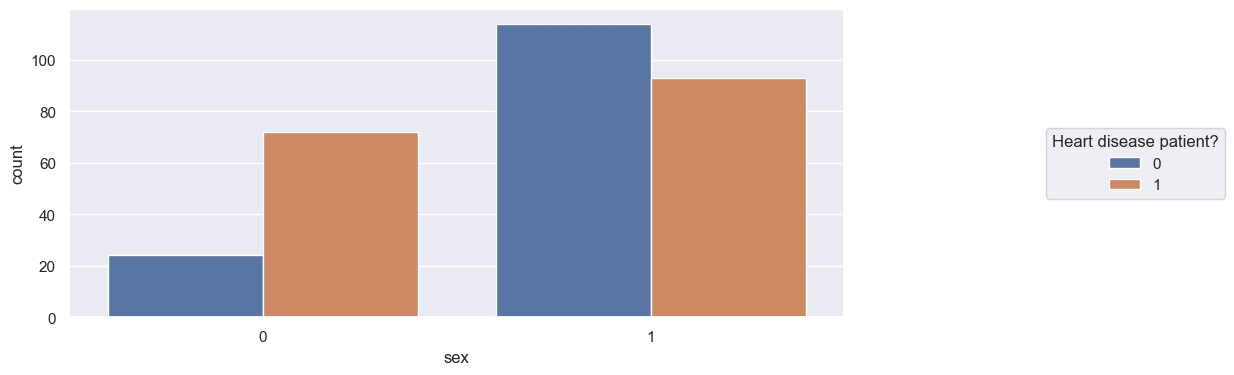

In [9]:
# Look into distribution by plotting a histogram
plt.figure(figsize=(10,4))
plt.legend(loc='upper left')

g = sns.countplot(data = data, x = 'sex', hue = 'target')
g.legend(title = 'Heart disease patient?', loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

**Where 1 is male, and 0 is female

In [10]:
sex_corr = ['sex', 'target']
sex_corr1 = data[sex_corr]
sex_corr_y = data[sex_corr1['target'] == 0].groupby(['sex']).size().reset_index(name = 'count')
sex_corr_y.corr()

,sex,count
sex,1.0,1.0
count,1.0,1.0


In [11]:
sex_corr_n = sex_corr1[sex_corr1['target'] == 1].groupby(['sex']).size().reset_index(name = 'count')
sex_corr_n.corr()

,sex,count
sex,1.0,1.0
count,1.0,1.0


# Chi-square test
Sex is a categorical variable. Target, which tells us whether the patient has heart disease or not, is also a categorical variable. To compute the correlation between two categorical data, we will need to use Chi-Square test. We will be using 95% confidence interval (95% chance that the confidence interval I calculated contains the true population mean).

The null hypothesis is that they are independent.
The alternative hypothesis is that they are correlated in some way.

In [12]:
cont = pd.crosstab(data["sex"],data["target"])
scipy.stats.chi2_contingency(cont)

Chi2ContingencyResult(statistic=22.717227046576355, pvalue=1.8767776216941503e-06, dof=1, expected_freq=array([[ 43.72277228,  52.27722772],
       [ 94.27722772, 112.72277228]]))

I performed the test and obtained a p-value < 0.05 and I can reject the hypothesis of independence. So is there truly a correlation between sex and heart disease? Well, I can't really accept this result here mainly for one reason. The data for healthy female is too low. I only have 24 female individuals that are healthy. If I were to push the number up to, let's say 94, I will get a much higher p-value. Hence, I feel that there is no point in performing a correlation analysis if the difference between the test samples are too high.

# Correlation between chest pain and heart disease

In [13]:
# Chi-square test
cont1 = pd.crosstab(data["cp"],data["target"])
scipy.stats.chi2_contingency(cont1)

Chi2ContingencyResult(statistic=81.68642755194445, pvalue=1.3343043373050064e-17, dof=3, expected_freq=array([[65.12871287, 77.87128713],
       [22.77227723, 27.22772277],
       [39.62376238, 47.37623762],
       [10.47524752, 12.52475248]]))

Seems like chest pain is correlated to heart disease.

# Correlation between resting blood pressure and heart disease

In [14]:
restbp_corr = ['trestbps', 'target']
restbp_corr1 = data[restbp_corr]
restbp_corr_y = restbp_corr1[restbp_corr1['target'] == 0].groupby(['trestbps']).size().reset_index(name = 'count')
restbp_corr_y.corr()

,trestbps,count
trestbps,1.000000,-0.262763
count,-0.262763,1.000000


In [15]:
restbp_corr_n = restbp_corr1[restbp_corr1['target'] == 1].groupby(['trestbps']).size().reset_index(name = 'count')
restbp_corr_n.corr()

,trestbps,count
trestbps,1.000000,-0.093598
count,-0.093598,1.000000


This shows that heart disease is correlated to resting blood pressure. If we look back into the Pairplot, we will see that heart disease patients have slightly higher resting blood pressure as compared to healthy patients.

# Correlation between serum cholesterol and heart disease
Here, I am rounding the cholesterol value to the tenth place. If I dont do that I'll get tons of count = 1. This will affect the correlation test.

In [16]:
# Showing number of heart disease patients based on serum cholesterol
chol_corr = ['chol', 'target']
chol_corr1 = data[chol_corr]
chol_corr2 = chol_corr1.copy() 
chol_corr2.chol = chol_corr2.chol.round(decimals=-1)
chol_corr_y = chol_corr2[chol_corr2['target'] == 0].groupby(['chol']).size().reset_index(name = 'count')
chol_corr_y.corr()

,chol,count
chol,1.000000,-0.014997
count,-0.014997,1.000000


In [17]:
# Showing number of healthy patients based on serum cholesterol
chol_corr_n = chol_corr1[chol_corr1['target'] == 1].groupby(['chol']).size().reset_index(name = 'count')
chol_corr_n.corr()

,chol,count
chol,1.000000,-0.178612
count,-0.178612,1.000000


No strong correlation between serum cholesterol and heart disease.

# Correlation between ECG results and heart disease
Value 0: showing probable or definite left ventricular hypertrophy by Estes' criteria

Value 1: normal

Value 2: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV)

In [18]:
# Showing number of heart disease patients based on resting ECG results
restecg_corr = ['restecg', 'target']
restecg_corr1 = data[restecg_corr]
restecg_corr_y = restecg_corr1[restecg_corr1['target'] == 0].groupby(['restecg']).size().reset_index(name = 'count')
restecg_corr_y

,restecg,count
0,0,79
1,1,56
2,2,3


In [19]:
# Showing number of healthy patients based on resting ECG results
restecg_corr_n = restecg_corr1[restecg_corr1['target'] == 1].groupby(['restecg']).size().reset_index(name = 'count')
restecg_corr_n

,restecg,count
0,0,68
1,1,96
2,2,1


In [20]:
# Chi-square test
cont4 = pd.crosstab(data["restecg"],data["target"])
scipy.stats.chi2_contingency(cont4)

Chi2ContingencyResult(statistic=10.023091785081, pvalue=0.006660598773498031, dof=2, expected_freq=array([[66.95049505, 80.04950495],
       [69.22772277, 82.77227723],
       [ 1.82178218,  2.17821782]]))

I obtained a p-value of 0.00666. This shows that there is a correlation between the various types of ECG results and heart disease. I do see a huge difference normal ECG between healthy and heart disease patients.

# Correlation between maximum heart rate and heart disease

In [21]:
# Showing number of heart disease patients based on maximum heart rate
heartrate_corr = ['thalach', 'target']
heartrate_corr1 = data[heartrate_corr]
heartrate_corr_y = heartrate_corr1[heartrate_corr1['target'] == 0].groupby(['thalach']).size().reset_index(name = 'count')
heartrate_corr_y.corr()

,thalach,count
thalach,1.000000,0.133651
count,0.133651,1.000000


In [22]:
heartrate_corr_n = heartrate_corr1[heartrate_corr1['target'] == 1].groupby(['thalach']).size().reset_index(name = 'count')
heartrate_corr_n.corr()

,thalach,count
thalach,1.000000,0.239275
count,0.239275,1.000000


No strong correlation between maximum heart rate and heart disease. If I look into the distribution, I do see close similarity in maximum heart rate in both heart disease patients and healthy patients.

# Conclusion  
  
From the results, I can confidently say that resting ECG results, resting blood pressure and types of chest pains are correlated to heart disease. Also, although I do see a correlation when performing Chi-Square test on the gender attribute, the huge difference in healthy female data posed a huge concern for its accuracy.




